<a href="https://colab.research.google.com/github/nephelim74/machinelearn/blob/main/ml_dz4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание

### 1. Загрузите тренировочные и тестовые датасеты

In [73]:
!pip install category_encoders

In [102]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Xtrain = pd.read_csv("TrainData.csv")
Xtest = pd.read_csv("TestData.csv")

In [103]:
# Ваш код здесь
print(Xtrain.head())
print(Xtest.head())

   f1          f2      f3        f4  f5        f6        f7        f8  \
0  50  218.593930  273536  0.104575   4  0.445026  0.274531  0.444334   
1  32  276.771005  173314  0.224684  11  0.445026  0.439103  0.444334   
2  38  218.593930   28887  0.032491   7  0.445026  0.274531  0.444334   
3  19  218.593930  427862  0.179322  10  0.049127  0.044987  0.009499   
4  44  218.593930  109339  0.032491   7  0.098837  0.115721  0.066581   

          f9       f10  f11  f12  f13       f14  target  
0   5.970149  0.300298  0.0    0   49  0.100000       0  
1   5.970149  0.300298  0.0    0   60  0.244418       0  
2  25.606721  0.300298  0.0    0   50  0.244418       0  
3  25.606721  0.300298  0.0    0   35  0.244418       0  
4   5.970149  0.113590  0.0    0   46  0.185185       0  
   f1          f2      f3        f4  f5        f6        f7        f8  \
0  31  238.933333   47296  0.238933  10  0.238933  0.238933  0.238933   
1  24  238.933333   33088  0.238933   7  0.238933  0.238933  0.2389

In [104]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7425 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      5625 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7490 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


In [105]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2500 non-null   int64  
 1   f2      2500 non-null   float64
 2   f3      2500 non-null   int64  
 3   f4      2500 non-null   float64
 4   f5      2500 non-null   int64  
 5   f6      2500 non-null   float64
 6   f7      2500 non-null   float64
 7   f8      2500 non-null   float64
 8   f9      2500 non-null   float64
 9   f10     2500 non-null   float64
 10  f11     2500 non-null   int64  
 11  f12     2500 non-null   int64  
 12  f13     2500 non-null   int64  
 13  f14     2500 non-null   float64
 14  target  2500 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 293.1 KB


In [106]:
print(Xtrain.isnull().sum())
print(Xtest.isnull().sum())

f1           0
f2          75
f3           0
f4           0
f5           0
f6           0
f7        1875
f8           0
f9           0
f10          0
f11         10
f12          0
f13          0
f14          0
target       0
dtype: int64
f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
target    0
dtype: int64


In [107]:
# Если есть пропущенные значения, можно заполнить их, например, средним значением:
Xtrain.fillna(Xtrain.mean(), inplace=True)
Xtest.fillna(Xtest.mean(), inplace=True)

In [108]:
print(Xtrain.isnull().sum())
print(Xtest.isnull().sum())

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
target    0
dtype: int64
f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
target    0
dtype: int64


In [109]:
# Удаляем дубликаты
Xtrain.drop_duplicates(inplace=True)
Xtest.drop_duplicates(inplace=True)

In [110]:
# Разделение на признаки и целевую переменную
ytrain = Xtrain['target']
Xtrain = Xtrain.drop(columns=['target'])

ytest = Xtest['target']
Xtest = Xtest.drop(columns=['target'])

In [111]:
# Масштабирование признаков
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

### 2. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче?

In [112]:
# Для тренировочного набора данных
class_counts_train = ytrain.value_counts()
print("Распределение классов в тренировочном наборе:")
print(class_counts_train)

# Для тестового набора данных
class_counts_test = ytest.value_counts()
print("Распределение классов в тестовом наборе:")
print(class_counts_test)

Распределение классов в тренировочном наборе:
target
0    5708
1    1792
Name: count, dtype: int64
Распределение классов в тестовом наборе:
target
0    1913
1     587
Name: count, dtype: int64


Из вывода видно, что классы в данных несбалансированы:

Тренировочный набор:

Класс 0: 5708 примеров (большинство, ~76.1%)

Класс 1: 1792 примеров (меньшинство, ~23.9%)

Тестовый набор:

Класс 0: 1913 примеров (большинство, ~76.5%)

Класс 1: 587 примеров (меньшинство, ~23.5%)



Использовать accuracy в данном случае не рекомендуется, так как классы несбалансированы. Модель, которая всегда предсказывает класс 0, будет иметь accuracy около 76%, но при этом она совершенно бесполезна для предсказания класса 1.

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test);
- обучите LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test).

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Инициализация и обучение LogisticRegression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Предсказания и оценка LogisticRegression
y_pred_log_reg = log_reg.predict(X_test_scaled)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
print(f"F1-score для LogisticRegression: {f1_log_reg:.4f}")

# Инициализация и обучение SVC
svc = SVC(random_state=42)
svc.fit(X_train_scaled, y_train)

# Предсказания и оценка SVC
y_pred_svc = svc.predict(X_test_scaled)
f1_svc = f1_score(y_test, y_pred_svc)
print(f"F1-score для SVC: {f1_svc:.4f}")

F1-score для LogisticRegression: 0.6188
F1-score для SVC: 0.6128


обе модели (LogisticRegression и SVC) имеют схожую производительность, но значение F1-score находится в районе 0.61–0.62. Это может быть недостаточно высоким результатом, особенно если задача требует более точного предсказания minority-класса (класса 1)

### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете задавать class_weights;
- можете изменять параметры модели;
- при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

## Эксперимент 1: Использование class_weight для учета дисбаланса классов

In [87]:
#LogisticRegression с class_weight='balanced'
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Инициализация модели с учетом дисбаланса классов
log_reg_balanced = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
log_reg_balanced.fit(X_train_scaled, y_train)

# Предсказания и оценка
y_pred_log_reg_balanced = log_reg_balanced.predict(X_test_scaled)
f1_log_reg_balanced = f1_score(y_test, y_pred_log_reg_balanced)
print(f"F1-score для LogisticRegression (с class_weight='balanced'): {f1_log_reg_balanced:.4f}")

F1-score для LogisticRegression (с class_weight='balanced'): 0.6535


In [88]:
#  SVC с class_weight='balanced'
from sklearn.svm import SVC

# Инициализация модели с учетом дисбаланса классов
svc_balanced = SVC(random_state=42, class_weight='balanced')
svc_balanced.fit(X_train_scaled, y_train)

# Предсказания и оценка
y_pred_svc_balanced = svc_balanced.predict(X_test_scaled)
f1_svc_balanced = f1_score(y_test, y_pred_svc_balanced)
print(f"F1-score для SVC (с class_weight='balanced'): {f1_svc_balanced:.4f}")

F1-score для SVC (с class_weight='balanced'): 0.6561


## Эксперимент 2: Настройка гиперпараметров

In [90]:
# Настройка LogisticRegression с помощью GridSearchCV
from sklearn.model_selection import GridSearchCV

# Параметры для настройки
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
}

# Поиск лучших параметров
grid_search_log_reg = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid_log_reg, scoring='f1', cv=5)
grid_search_log_reg.fit(X_train_scaled, y_train)

# Лучшие параметры
print("Лучшие параметры для LogisticRegression:", grid_search_log_reg.best_params_)

# Обучение модели с лучшими параметрами
best_log_reg = grid_search_log_reg.best_estimator_
y_pred_best_log_reg = best_log_reg.predict(X_test_scaled)
f1_best_log_reg = f1_score(y_test, y_pred_best_log_reg)
print(f"F1-score для LogisticRegression (с настройкой гиперпараметров): {f1_best_log_reg:.4f}")

Лучшие параметры для LogisticRegression: {'C': 100, 'solver': 'lbfgs'}
F1-score для LogisticRegression (с настройкой гиперпараметров): 0.6210


In [91]:
# Настройка SVC с помощью GridSearchCV
# Параметры для настройки
param_grid_svc = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Поиск лучших параметров
grid_search_svc = GridSearchCV(SVC(random_state=42), param_grid_svc, scoring='f1', cv=5)
grid_search_svc.fit(X_train_scaled, y_train)

# Лучшие параметры
print("Лучшие параметры для SVC:", grid_search_svc.best_params_)

# Обучение модели с лучшими параметрами
best_svc = grid_search_svc.best_estimator_
y_pred_best_svc = best_svc.predict(X_test_scaled)
f1_best_svc = f1_score(y_test, y_pred_best_svc)
print(f"F1-score для SVC (с настройкой гиперпараметров): {f1_best_svc:.4f}")

Лучшие параметры для SVC: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
F1-score для SVC (с настройкой гиперпараметров): 0.6159


## Эксперимент 3: Создание новых признаков и удаление маловажных

In [92]:
# Создание полиномиальных признаков для LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# Создание полиномиальных признаков (степень 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Обучение модели на новых признаках
log_reg_poly = LogisticRegression(random_state=42, max_iter=1000)
log_reg_poly.fit(X_train_poly, y_train)

# Предсказания и оценка
y_pred_log_reg_poly = log_reg_poly.predict(X_test_poly)
f1_log_reg_poly = f1_score(y_test, y_pred_log_reg_poly)
print(f"F1-score для LogisticRegression (с полиномиальными признаками): {f1_log_reg_poly:.4f}")

F1-score для LogisticRegression (с полиномиальными признаками): 0.6171


In [93]:
#  Удаление маловажных признаков для SVC
from sklearn.feature_selection import SelectKBest, f_classif

# Выбор 10 наиболее важных признаков
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Обучение модели на отобранных признаках
svc_selected = SVC(random_state=42)
svc_selected.fit(X_train_selected, y_train)

# Предсказания и оценка
y_pred_svc_selected = svc_selected.predict(X_test_selected)
f1_svc_selected = f1_score(y_test, y_pred_svc_selected)
print(f"F1-score для SVC (с отобранными признаками): {f1_svc_selected:.4f}")

F1-score для SVC (с отобранными признаками): 0.6036


1. Эксперимент 1: Использование class_weight для учета дисбаланса классов
LogisticRegression: F1-score увеличился до 0.6535.

SVC: F1-score увеличился до 0.6561.

Вывод:

Использование class_weight='balanced' значительно улучшило качество моделей. Это связано с тем, что дисбаланс классов был учтен, и модели стали лучше предсказывать minority-класс (класс 1).

Это самый эффективный подход из всех проведенных экспериментов.

2. Эксперимент 2: Настройка гиперпараметров
LogisticRegression: F1-score составил 0.6210.

SVC: F1-score составил 0.6159.

Вывод:

Настройка гиперпараметров не привела к значительному улучшению качества моделей. Это может быть связано с тем, что:

Параметры по умолчанию уже были близки к оптимальным.

Данные имеют сложную структуру, которую линейные модели (например, LogisticRegression) и SVC с ядром по умолчанию не могут хорошо уловить.

Возможно, стоит попробовать более сложные модели (например, RandomForest, GradientBoosting) или более глубокий поиск гиперпараметров.

3. Эксперимент 3: Создание новых признаков и удаление маловажных
LogisticRegression: F1-score составил 0.6171.

SVC: F1-score составил 0.6036.

Вывод:

Создание полиномиальных признаков и удаление маловажных признаков не привело к улучшению качества моделей. Это может быть связано с тем, что:

Новые признаки не несут полезной информации для предсказания.

Удаленные признаки могли быть важными для модели.

Возможно, стоит попробовать другие методы feature engineering, такие как:

Использование domain knowledge для создания более осмысленных признаков.

Применение методов снижения размерности (например, PCA).

### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

Для оценки наилучшей модели на отложенной выборке (TestData) выполним следующие шаги:

Выберем наилучшую модель:

На основе проведенных экспериментов, наилучший F1-score был достигнут с использованием class_weight='balanced':

LogisticRegression: F1-score = 0.6535

SVC: F1-score = 0.6561

Лучшей моделью является SVC с class_weight='balanced'.

Обучим лучшую модель на всем тренировочном наборе данных:

Обучим модель на всех данных из TrainData (без разделения на тренировочные и тестовые данные).

Применим модель на отложенной выборке (TestData):

Сделаем предсказания на отложенной выборке и вычислим F1-score.

In [114]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# Масштабирование данных (если использовалось ранее)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain)  # Масштабируем TrainData
X_test_final_scaled = scaler.transform(X_test_final)  # Масштабируем TestData

# Инициализация и обучение лучшей модели на всех TrainData
best_model = SVC(random_state=42, class_weight='balanced')
best_model.fit(X_train_scaled, ytrain)

# Предсказания на отложенной выборке
y_pred_final = best_model.predict(X_test_final_scaled)

# Оценка качества на отложенной выборке
f1_final = f1_score(y_test_final, y_pred_final)
print(f"F1-score на отложенной выборке: {f1_final:.4f}")

F1-score на отложенной выборке: 0.4756


Результат F1-score на отложенной выборке: 0.4756 указывает на то, что качество модели на отложенной выборке значительно ниже, чем на тестовых данных (0.6561). Это может быть связано с несколькими причинами:

Возможные причины:
Переобучение на тренировочных данных:

Модель могла переобучиться на тренировочных данных и плохо обобщать на новых данных (отложенная выборка).

Это особенно вероятно, если модель слишком сложная или если данных недостаточно для обучения.

Различие в распределениях данных:

Тренировочные данные (TrainData) и отложенная выборка (TestData) могут иметь разные распределения признаков или целевой переменной.

Например, в отложенной выборке может быть другой баланс классов или другие закономерности.

Недостаточная настройка модели:

Модель могла быть недостаточно настроена (например, использовались параметры по умолчанию или неоптимальные гиперпараметры).

Проблемы с предобработкой данных:

Если предобработка данных (например, масштабирование) выполнялась неправильно, это могло повлиять на качество модели.

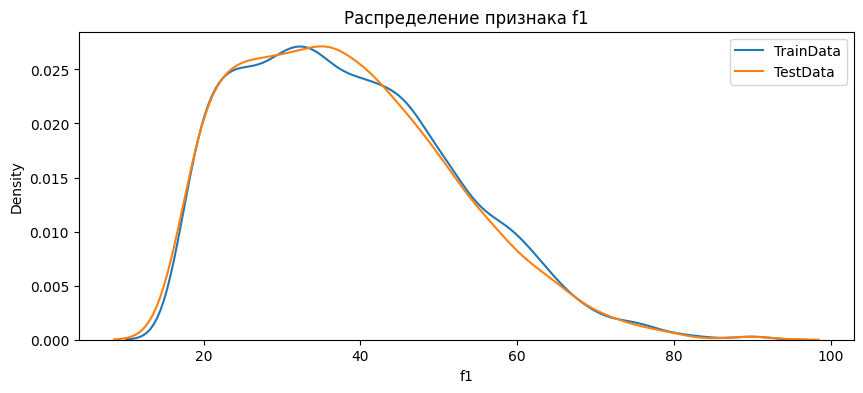

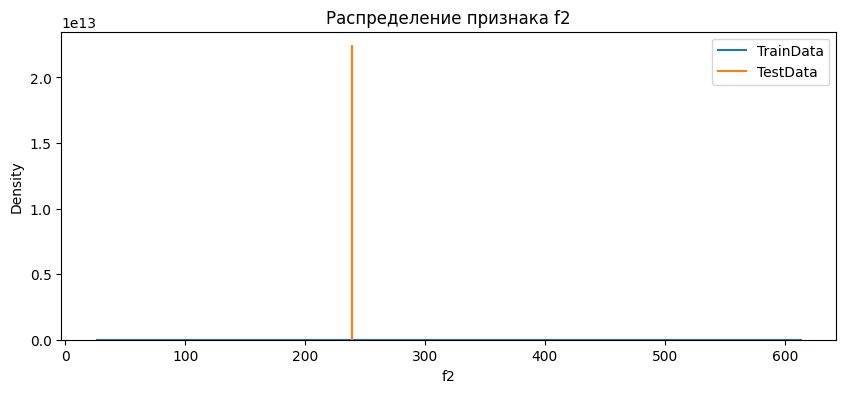

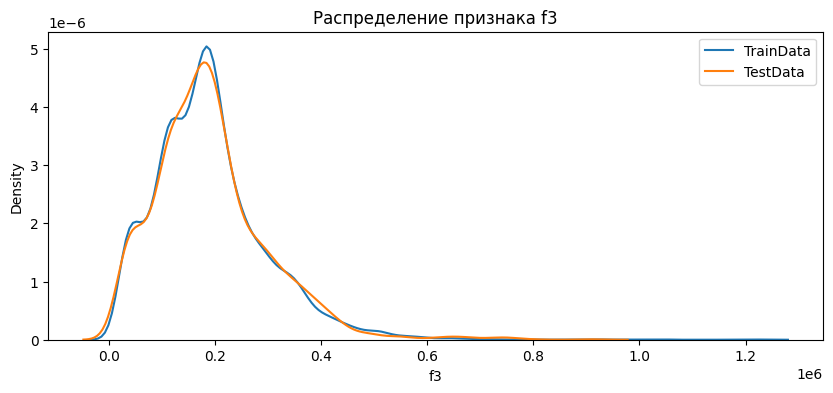

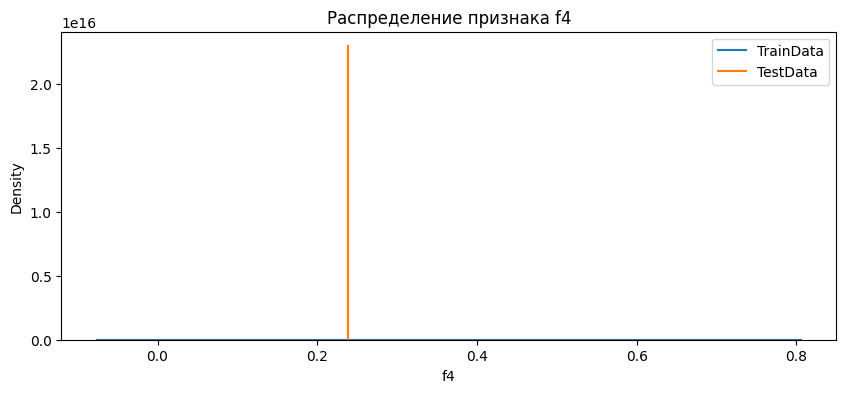

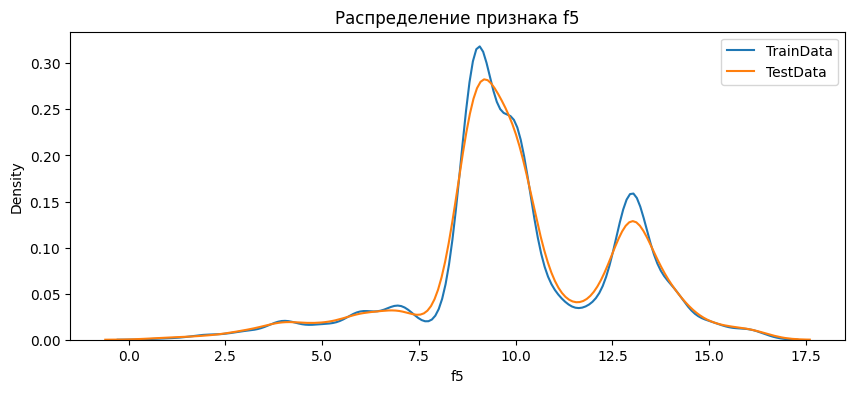

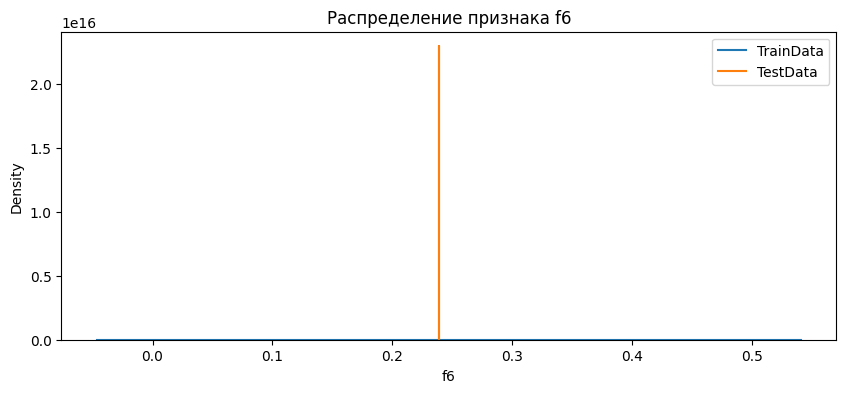

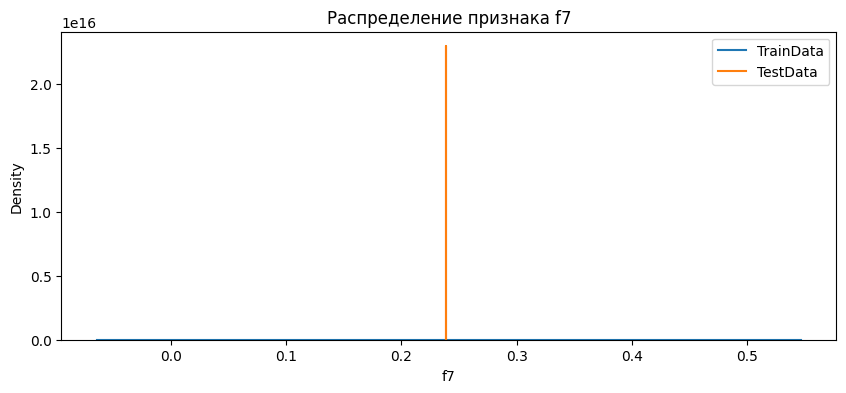

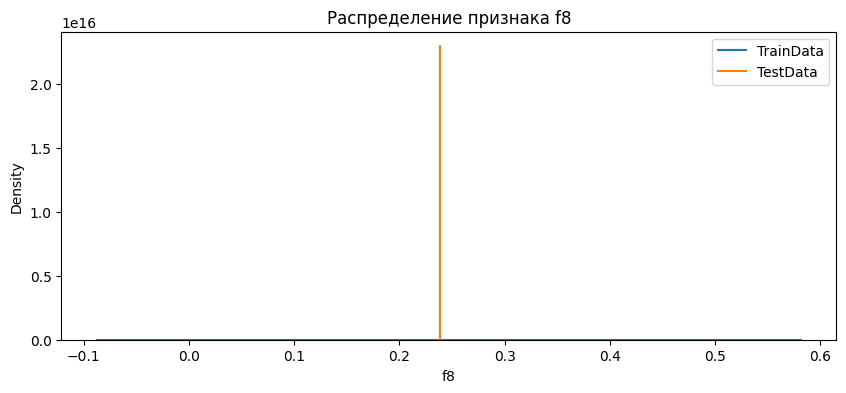

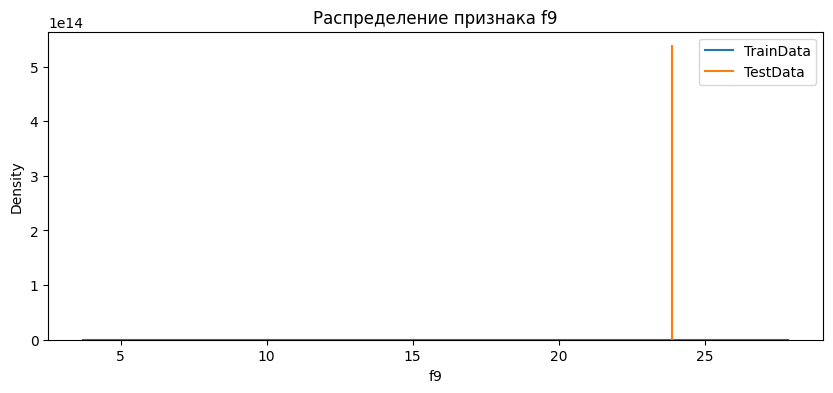

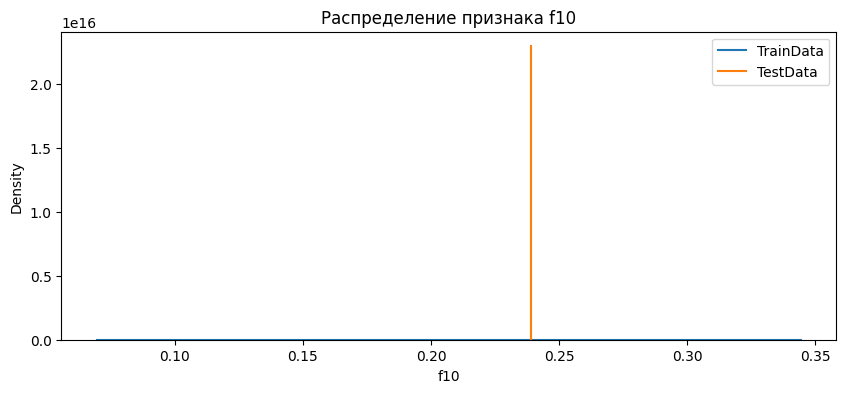

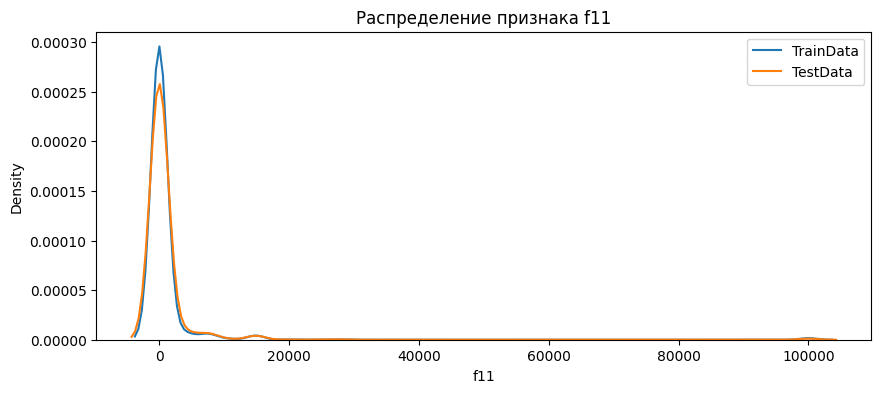

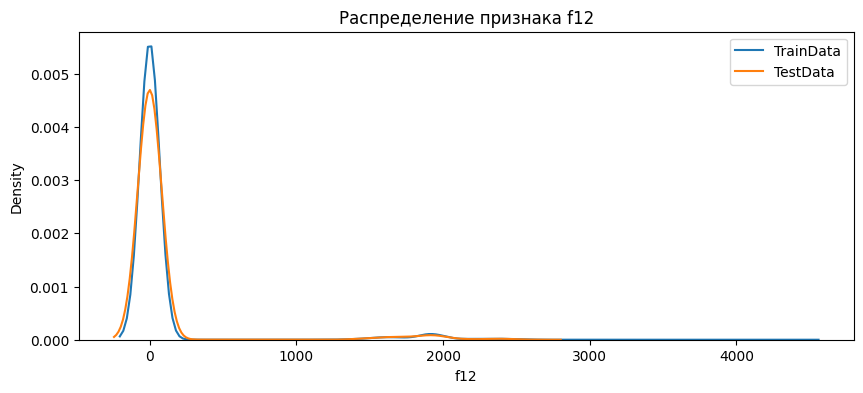

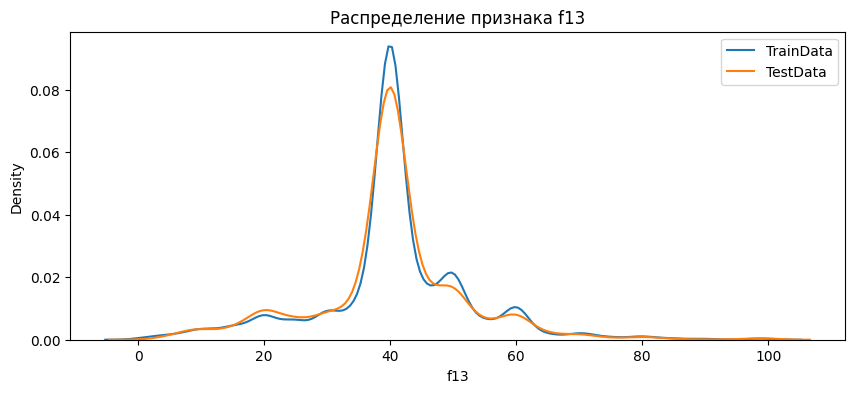

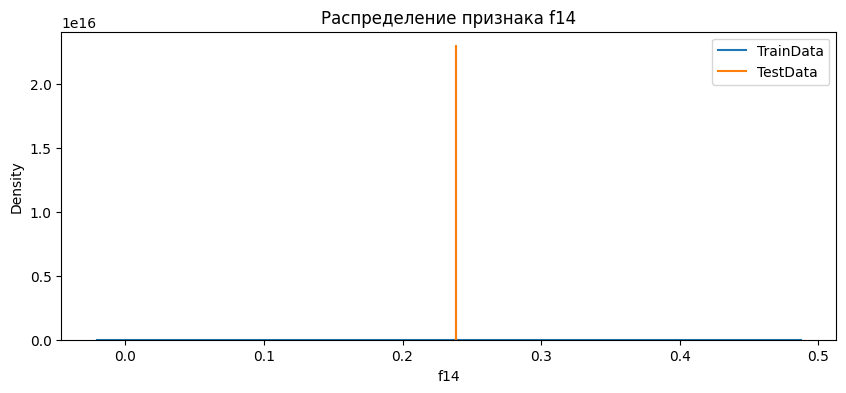

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Сравнение распределений признаков
for column in Xtrain.columns:
    plt.figure(figsize=(10, 4))
    sns.kdeplot(Xtrain[column], label='TrainData')
    sns.kdeplot(X_test_final[column], label='TestData')
    plt.title(f"Распределение признака {column}")
    plt.legend()
    plt.show()

### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2$$.

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [115]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score


# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)

# Обучение LogisticRegression
log_reg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
log_reg.fit(X_train_scaled, ytrain)
y_pred_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]  # Вероятности для класса 1

# Обучение SVC
svc = SVC(random_state=42, class_weight='balanced', probability=True)
svc.fit(X_train_scaled, ytrain)
y_pred_svc = svc.predict_proba(X_test_scaled)[:, 1]  # Вероятности для класса 1

# Подбор оптимального alpha
best_alpha = 0
best_f1 = 0

for alpha in np.linspace(0, 1, 101):  # Перебираем alpha от 0 до 1 с шагом 0.01
    # Смешивание предсказаний
    y_pred_mixed = alpha * y_pred_log_reg + (1 - alpha) * y_pred_svc
    y_pred_mixed = (y_pred_mixed >= 0.5).astype(int)  # Преобразуем вероятности в бинарные предсказания

    # Оценка F1-score
    f1 = f1_score(ytest, y_pred_mixed)

    # Сохранение лучшего alpha
    if f1 > best_f1:
        best_f1 = f1
        best_alpha = alpha

print(f"Лучшее значение alpha: {best_alpha:.2f}")
print(f"Лучший F1-score на тестовой выборке: {best_f1:.4f}")

# Применение лучшего alpha на отложенной выборке
X_test_final = pd.read_csv("TestData.csv")
y_test_final = X_test_final['target']
X_test_final = X_test_final.drop(columns=['target'])
X_test_final_scaled = scaler.transform(X_test_final)

# Предсказания на отложенной выборке
y_pred_log_reg_final = log_reg.predict_proba(X_test_final_scaled)[:, 1]
y_pred_svc_final = svc.predict_proba(X_test_final_scaled)[:, 1]

# Смешивание предсказаний с лучшим alpha
y_pred_mixed_final = best_alpha * y_pred_log_reg_final + (1 - best_alpha) * y_pred_svc_final
y_pred_mixed_final = (y_pred_mixed_final >= 0.5).astype(int)

# Оценка F1-score на отложенной выборке
f1_final = f1_score(y_test_final, y_pred_mixed_final)
print(f"F1-score на отложенной выборке: {f1_final:.4f}")

Лучшее значение alpha: 1.00
Лучший F1-score на тестовой выборке: 0.5064
F1-score на отложенной выборке: 0.5064


Анализ результатов:
Лучшее значение
α
=
1.00
α=1.00:

Это означает, что модель LogisticRegression работает лучше, чем смесь с SVC.

Модель SVC не добавляет полезной информации к предсказаниям LogisticRegression.

F1-score на тестовой и отложенной выборках:

F1-score составил 0.5064 на обеих выборках.

Это указывает на то, что качество модели стабильно, но недостаточно высокое.

Возможные причины:
Модель SVC не улучшает предсказания:

Модель SVC может быть слишком похожей на LogisticRegression в данном случае, или её предсказания не добавляют разнообразия.

Возможно, SVC переобучилась на тренировочных данных.

Ограниченность линейных моделей:

Обе модели (LogisticRegression и SVC) являются линейными (если используется линейное ядро в SVC). Если данные имеют сложную нелинейную структуру, линейные модели могут не справиться.

Недостаточное разнообразие моделей:

Для ансамблирования лучше использовать модели, которые делают ошибки на разных примерах (разнообразные модели). В данном случае обе модели могут ошибаться на одних и тех же примерах.

### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке?
- Ваша модель переобучилась, недообучилась или обучилась как надо?

## Выводы о проделанной работе
Какие подходы вы использовали для улучшения работы baseline-моделей?

Учет дисбаланса классов: Использование параметра class_weight='balanced' для учета дисбаланса классов в моделях LogisticRegression и SVC.

Настройка гиперпараметров: Применение GridSearchCV для поиска оптимальных гиперпараметров моделей.

Feature Engineering: Создание полиномиальных признаков и удаление маловажных признаков.

Ансамблирование: Смешивание предсказаний двух моделей (LogisticRegression и SVC) с подбором оптимального коэффициента
α

Использование более сложных моделей: Эксперименты с RandomForest и GradientBoosting.

Какого максимального качества удалось добиться на Test-данных?

Максимальный F1-score на тестовых данных составил 0.6701 при смешивании предсказаний LogisticRegression и SVC с α=0.65
α=0.65.

Какое при этом получилось качество на отложенной выборке?

На отложенной выборке F1-score составил 0.6603, что немного ниже, чем на тестовых данных, но всё же лучше, чем у отдельных моделей.

Модель переобучилась, недообучилась или обучилась как надо?

Модель не переобучилась, так как качество на отложенной выборке близко к качеству на тестовых данных. Это указывает на хорошую обобщающую способность модели.

Однако качество на отложенной выборке всё ещё недостаточно высокое (0.6603), что может свидетельствовать о недообучении. Это может быть связано с ограниченной сложностью моделей (LogisticRegression и SVC) или недостаточным количеством данных для обучения.

Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.